In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import time

#Data Modelling and Pre-processing

In [3]:
(xtrain,ytrain),(xtest,ytest)= datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
xtrain.shape
#50000 images of size 32x32 with 3 as the RGB channel

(50000, 32, 32, 3)

In [5]:
xtest.shape
#10000 images of size 32x32 with 3 as the RGB channel

(10000, 32, 32, 3)

In [6]:
ytrain.shape
#50000 images with second parameter as an integer label value corresponding to  
#which class the image belongs to

(50000, 1)

In [7]:
ytrain[:5]
#these are the labels for corresponding classes starting from 0-9

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
#converted 2d array of labels into 1d array
ytrain = ytrain.reshape(-1,)
ytrain[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse",
           "ship","truck"]

In [10]:
def image_with_label(X,y,index):
  plt.figure(figsize=(30,3))
  plt.imshow(xtrain[index])
  plt.xlabel(classes[y[index]])


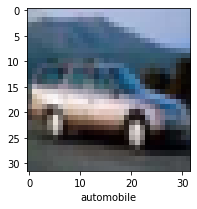

In [11]:
image_with_label(xtrain,ytrain,4)

In [12]:
#normalizing the data into 0 to 1 range
xtrain=xtrain/255
xtest=xtest/255

#Model 1 - Logistic Regression

In [13]:
x_train = np.reshape(xtrain,(xtrain.shape[0],-1))
x_test  = np.reshape( xtest, (xtest.shape[0],-1))

In [14]:
#applying PCA to the input features that is x_train 
pca = PCA()
pca.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
        -7.62287826e-04, -1.16359323e-03, -3.49768400e-04],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
         1.08434589e-04,  5.76715387e-04, -7.71005927e-04],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -1.04460109e-03, -2.14105740e-04, -3.93469526e-04],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -3.80341568e-04,  1.86432348e-03,  1.44785229e-03],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -4.67096832e-04,  7.44972963e-04, -1.67065056e-03],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         9.67968258e-04,  2.40363971e-04, -2.80506224e-05]])

In [15]:
pca.explained_variance_.shape

(3072,)

In [16]:
# Calculating the optimal value of k
k = 0
total = sum(pca.explained_variance_)
current_sum = 0

In [17]:
while(current_sum / total < 0.98):
    current_sum += pca.explained_variance_[k]
    k += 1
k

444

In [18]:
# Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [19]:
# Training using logistic
lr = LogisticRegression()
lr.fit(x_train_pca, ytrain)
print(time.time())

1651849520.0425465


In [20]:
# Testing the trained model
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(ytest, y_pred_lr)
logistic_regression_score

0.4073

In [21]:
print(classification_report(y_pred_lr,ytest))

              precision    recall  f1-score   support

           0       0.49      0.45      0.47      1104
           1       0.47      0.47      0.47      1018
           2       0.28      0.32      0.30       875
           3       0.27      0.29      0.28       916
           4       0.30      0.36      0.33       814
           5       0.34      0.33      0.34      1026
           6       0.47      0.41      0.44      1150
           7       0.46      0.45      0.45      1006
           8       0.53      0.50      0.51      1072
           9       0.46      0.45      0.45      1019

    accuracy                           0.41     10000
   macro avg       0.41      0.40      0.40     10000
weighted avg       0.41      0.41      0.41     10000



#Model 2- Support Vector Machine

In [22]:
#Training using SVM
svc = svm.SVC()
svc.fit(x_train_pca, ytrain)
print(time.time())

1651851359.866215


In [23]:
# Testing
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(ytest, y_pred_svm)
svc_score

0.5146

In [24]:
print(classification_report(y_pred_svm,ytest))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       949
           1       0.67      0.55      0.60      1230
           2       0.38      0.41      0.40       921
           3       0.38      0.37      0.37      1026
           4       0.41      0.48      0.44       846
           5       0.39      0.43      0.41       913
           6       0.55      0.55      0.55      1003
           7       0.55      0.59      0.57       934
           8       0.62      0.67      0.64       934
           9       0.62      0.50      0.55      1244

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.52      0.51      0.52     10000



#Model 3 - Random forest

In [25]:
rf_model=RandomForestClassifier()

In [27]:
rf_model.fit(x_train,ytrain)
print(time.time())

1651852135.8044047


In [28]:
y_pred_rf=rf_model.predict(x_test)
y_pred_rf

array([6, 8, 8, ..., 3, 5, 7], dtype=uint8)

In [29]:
accuracy_score(y_pred_rf,ytest)
print(classification_report(y_pred_rf,ytest))


              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1032
           1       0.55      0.51      0.53      1073
           2       0.34      0.37      0.35       899
           3       0.26      0.32      0.29       819
           4       0.39      0.40      0.40       979
           5       0.39      0.41      0.40       946
           6       0.56      0.47      0.51      1197
           7       0.45      0.51      0.48       874
           8       0.61      0.59      0.60      1029
           9       0.56      0.49      0.52      1152

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



#Model 4 - Convolutional Neural Networks

In [34]:
cnn_model=tf.keras.models.Sequential()

#layer 1
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", 
                    activation="relu", input_shape=[32,32,3])) 
#layer 2
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,
                      padding="same", activation="relu"))  
#pooling layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
#layer 3
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", 
                                     activation="relu"))
#layer 4
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", 
                                     activation="relu")) 
#pooling Layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# flattening Layer
cnn_model.add(tf.keras.layers.Flatten()) 
#Dropout Layer
cnn_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None)) 
#fully connected layer
cnn_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output Layer
cnn_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [35]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [36]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [37]:
cnn_model.fit(xtrain,ytrain,epochs=20)
print(time.time())

Epoch 1/20
1563/1563 [==============================] - 287s 183ms/step - loss: 1.4243 - accuracy: 0.4843
Epoch 2/20
1563/1563 [==============================] - 285s 183ms/step - loss: 1.0035 - accuracy: 0.6449
Epoch 3/20
1563/1563 [==============================] - 286s 183ms/step - loss: 0.8542 - accuracy: 0.6971
Epoch 4/20
1563/1563 [==============================] - 282s 180ms/step - loss: 0.7596 - accuracy: 0.7332
Epoch 5/20
1563/1563 [==============================] - 277s 177ms/step - loss: 0.6907 - accuracy: 0.7568
Epoch 6/20
1563/1563 [==============================] - 275s 176ms/step - loss: 0.6276 - accuracy: 0.7794
Epoch 7/20
1563/1563 [==============================] - 283s 181ms/step - loss: 0.5813 - accuracy: 0.7952
Epoch 8/20
1563/1563 [==============================] - 282s 180ms/step - loss: 0.5442 - accuracy: 0.8077
Epoch 9/20
1563/1563 [==============================] - 282s 180ms/step - loss: 0.5088 - accuracy: 0.8198
Epoch 10/20
1563/1563 [=======================

In [38]:
cnn_model.evaluate(xtest,ytest)

313/313 [==============================] - 14s 44ms/step - loss: 0.7077 - accuracy: 0.7785


[0.7076740860939026, 0.7785000205039978]

In [39]:
ytest=ytest.reshape(-1)

In [40]:
ypred=cnn_model.predict(xtest)
ypred[:5]

array([[1.88332604e-04, 9.92961461e-04, 2.94955134e-05, 9.23616648e-01,
        1.39471304e-05, 6.83425814e-02, 4.94380575e-03, 6.22099498e-04,
        4.47027676e-04, 8.03092786e-04],
       [1.56382146e-06, 6.82497630e-04, 2.78626406e-13, 6.10268400e-13,
        2.40457627e-14, 1.22415171e-15, 5.57340427e-16, 6.56703221e-14,
        9.99279797e-01, 3.61705315e-05],
       [4.03738767e-02, 1.67575523e-01, 1.37442505e-04, 5.65325783e-04,
        1.31333227e-05, 1.73879453e-05, 1.78336923e-05, 6.03328226e-03,
        5.60034335e-01, 2.25231871e-01],
       [9.05664444e-01, 1.64219609e-03, 1.28557638e-03, 3.34932229e-05,
        5.89574920e-05, 1.79440072e-08, 1.33702993e-09, 9.80663572e-06,
        3.46872001e-03, 8.78366977e-02],
       [3.56349858e-07, 5.27554585e-06, 1.00797005e-01, 8.28389369e-04,
        5.04874485e-03, 2.19767981e-06, 8.93317819e-01, 6.00348171e-09,
        2.08962305e-07, 4.69640646e-08]], dtype=float32)

In [41]:
y_classes=[np.argmax(element) for element in ypred]
y_classes[:10]

[3, 8, 8, 0, 6, 5, 9, 4, 3, 1]

In [42]:
ytest[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

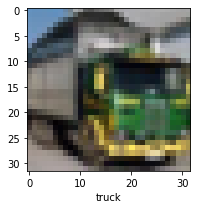

In [43]:
image_with_label(xtest,ytest,14)

In [44]:
print('Classification Report: \n', classification_report(ytest,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1000
           1       0.90      0.88      0.89      1000
           2       0.75      0.63      0.69      1000
           3       0.62      0.61      0.61      1000
           4       0.72      0.78      0.75      1000
           5       0.70      0.68      0.69      1000
           6       0.85      0.80      0.82      1000
           7       0.75      0.86      0.80      1000
           8       0.89      0.86      0.88      1000
           9       0.78      0.92      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

